# Week 5 -  Measurements and information extraction <a class="tocSkip">
    (c) Ariel Guerreiro 2023

Quantum information systems rely on the peculiarities of quantum mechanics to encode, transmit and manipulate information. A crucial aspect of quantum systems is the ability to obtain information about the system through measurements. Measurements allow us to gather data about the observable properties of a quantum state, such as the position or momentum of a particle.

However, in quantum information systems, information is encoded in the quantum state itself, which means that in some cases, it is not sufficient to measure only the observables properties of that system. Instead, it is necessary to pinpoint the quantum state of the system to retrieve such information. This requires careful consideration of both the limitations of measurements performed on quantum systems and the methods to retrieve information from it.

One of the most notable peculiarities of quantum mechanics is the collapse of the wave function. When a quantum system is measured, the wave function collapses to one of the possible eigenstates of the measured observable. This means that measurements on a quantum system can introduce significant quantum fluctuations, which must be taken into account when interpreting the results.

To retrieve information encoded in a quantum state, it is often necessary to perform quantum state tomography. This process involves making a series of measurements on the system and then using statistical inference to reconstruct the quantum state. However, even with state-of-the-art techniques, quantum state tomography is a challenging task due to the high dimensionality of the state space and the fragility of quantum systems.

Throughout this notebook, we will use interactive examples and exercises to help you gain a deeper understanding of these complex topics.

# Before we start... <a class="tocSkip">
 
  Let us begin by runnning the initialization cell
    
$$
\def\ket#1{\left|#1\right\rangle }%
\def\bra#1{\left\langle #1\right|}%
\def\braket#1#2{\langle#1|#2\rangle}%
$$
   

In [4]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import random
import re             # regular expressions module

from pylab import plot
from qiskit import *
from qiskit.visualization import *

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# State colapse <a name='Colapse'></a>


In a multipartite quantum system, where multiple qubits are entangled with each other, the collapse of the wave function due to a measurement can have complex effects on the entanglement structure of the system.

When a measurement is performed on a qubit in a multipartite system, the wave function describing the entire system collapses to one of the possible eigenstates of the measured observable. This collapse affects not only the measured qubit but also the entangled qubits in the system.

If the entangled qubits were initially in a superposition state with the measured qubit, the collapse of the wave function will cause the entangled qubits to also collapse to a specific eigenstate. This can result in a change in the entanglement structure of the system, as the entangled qubits may now be in a different entangled state with each other.

Furthermore, the collapse of the wave function due to a measurement on one qubit can also have nonlocal effects on other entangled qubits in the system. This is known as quantum nonlocality and is a consequence of entanglement in quantum mechanics.

The precise effects of wave function collapse on the entanglement structure of a multipartite quantum system depend on the specific details of the system and the measurements being performed. 

To exemplify some of the impacts of measurements on qubits, consider the next circuit. The quantum state generated is a superposition of the two-qubit states |00⟩ and |11⟩ with controlled overlap coefficients. The state can be written as:

$$|\psi\rangle = \frac{1}{\sqrt{2}} \left(\sqrt{1-\alpha^2}|00\rangle + \alpha |11\rangle\right)$$

where $\alpha$ is the overlap coefficient controlled by the rotation gate.

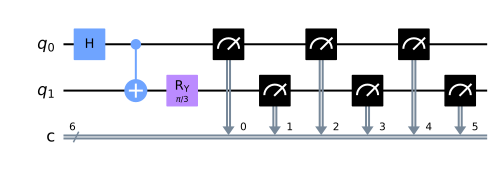

In [31]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

# Create a Quantum Circuit acting on a quantum register of 2 qubits and 2 bits
circuit = QuantumCircuit(2,6)

# Prepare the initial state as a superposition of |00> and |11>
overlap_coef = 0.5  # adjust this parameter to control the overlap coefficients
circuit.h(0)
circuit.cx(0, 1)
circuit.ry(2 * overlap_coef * np.arcsin(np.sqrt(1 - overlap_coef**2)), 1)

# Measure both qubits in the computational basis
circuit.measure([0,1],[0,1])
circuit.measure([0,1],[2,3])
circuit.measure([0,1],[4,5])
circuit.draw(output="mpl")

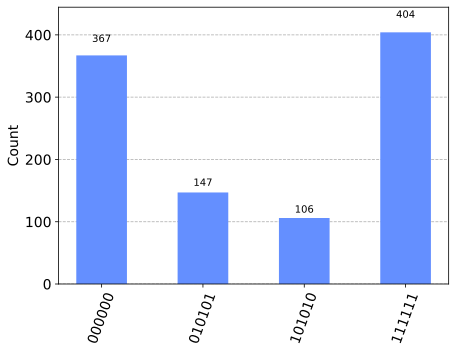

In [32]:
# Run the simulation and plot the results
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend=simulator).result()
plot_histogram(result.get_counts(circuit))

After measurement, the state collapses to one of the computational basis states |00⟩ or |11⟩ with probabilities given by the squared magnitudes of the coefficients in the superposition. The measurement outcomes can be visualized using a histogram of the measurement counts, as shown in the output of the plot_histogram() function in the previous code example.

<div class="alert alert-block alert-info">
<b>Question 1:</b> Provide an interpretation of the results of the previous circuit. 
</div>


First we have
$$
|\psi_0\rangle=|0\rangle\xrightarrow{\hat{H}}\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)
$$
$$
|\psi_1\rangle=|0\rangle
$$
Then passing the CNOT with the control as the first qubit and the target is the second qubit,
$$
|\Psi\rangle=\frac{1}{\sqrt{2}}(|00\rangle+|10\rangle)\xrightarrow{CNOT}\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)|\Psi'\rangle
$$
Then rotating the second qubit as
$$
\begin{align}
|\Psi'\rangle&\xrightarrow{I\otimes\hat{R_y}(2\alpha \arcsin(\sqrt{1-\alpha^2}))}\frac{1}{\sqrt{2}}\left[|0\rangle\otimes \begin{pmatrix}\cos(\alpha \arcsin(\sqrt{1-\alpha^2})) \\ \sin(\alpha \arcsin(\sqrt{1-\alpha^2}))\end{pmatrix}+|1\rangle\otimes \begin{pmatrix}-\sin(\alpha \arcsin(\sqrt{1-\alpha^2})) \\ \cos(\alpha \arcsin(\sqrt{1-\alpha^2}))\end{pmatrix}\right]\\[10pt]
&=\frac{1}{\sqrt{2}}\left[\cos(\alpha \arcsin(\sqrt{1-\alpha^2}))|00\rangle+\sin(\alpha \arcsin(\sqrt{1-\alpha^2}))|01\rangle-\sin(\alpha \arcsin(\sqrt{1-\alpha^2}))|10\rangle+\cos(\alpha \arcsin(\sqrt{1-\alpha^2}))|11\rangle\right]
\end{align}
$$
and we take 6 measurements, alternating between the first and second qubit.

The maximally entangled state for a system of N qubits is known as the "N-qubit GHZ state", which is given by:

$$|\mathrm{GHZ}\rangle = \frac{1}{\sqrt{2}} \left(|0\rangle^{\otimes N} + |1\rangle^{\otimes N}\right)$$

where $|0\rangle^{\otimes N}$ represents the tensor product of $N$ individual $|0\rangle$ states, and $|1\rangle^{\otimes N}$ represents the tensor product of $N$ individual $|1\rangle$ states.

The N-qubit GHZ state is maximally entangled because it is impossible to factorize it into a product of single-qubit states or pairs of qubits, meaning that the entanglement is spread out over all N qubits. It exhibits a type of correlation known as "Einstein-Podolsky-Rosen (EPR) steering", where the measurement outcomes on one qubit can be used to predict the outcomes on the other qubits, even if they are spatially separated.

The GHZ state is an important resource in quantum information processing, as it enables certain types of distributed quantum protocols such as quantum secret sharing and quantum teleportation. It is also used as a testbed for experimental demonstrations of multipartite entanglement and nonlocality. 




<div class="alert alert-block alert-info">
<b>Question 2:</b> How will the entanglement of the N-qubit GHZ state decreases as one measures more and more qubits in the computational basis?
</div>

In [33]:
def entropy_prob(p):
    return -np.sum(p*np.log2(p))  

In [34]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

Ni=2
N=Ni
Nf=20
overlap_coef = 0.5
Enp=np.zeros(Nf-Ni+1)
while N<=Nf:
# Create a Quantum Circuit acting on a quantum register of 2 qubits and 2 bits
    circuit = QuantumCircuit(N,N)

# Prepare the initial state as a superposition of |00> and |11>
  # adjust this parameter to control the overlap coefficients
    circuit.h(0)
    for i in range(1,N):
        circuit.cx(0, i)
        circuit.ry(2 * overlap_coef * np.arcsin(np.sqrt(1 - overlap_coef**2)), i)

# Measure both qubits in the computational basis
    for i in range(N):
        circuit.measure(np.arange(0,N),np.arange(0,N))

    # Run the simulation and plot the results
    s=100000
    simulator = Aer.get_backend('qasm_simulator')
    result = execute(circuit,backend=simulator,shots=s).result()
    counts=result.get_counts(circuit)
    p_list=list(counts.values())
    p=np.zeros(len(p_list))
    for i in range(len(p_list)):
        p[i]=p_list[i]/s
    Enp[N-Ni]=entropy_prob(p)
    N+=1

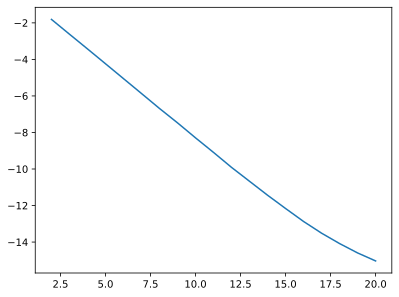

In [35]:
x=np.array(range(Ni,Nf+1))
y=-Enp
plot(x,y)

# Random number generator


In [36]:
def getKeysByValue(dictOfElements, valueToFind):
    listOfKeys = list()
    listOfItems = dictOfElements.items()
    for item  in listOfItems:
        if item[1] == valueToFind:
            listOfKeys.append(item[0])
    return  listOfKeys

In [37]:
def real_map(value, leftMin, leftMax, rightMin, rightMax):
    # Maps one range to another
    # Figure out how 'wide' each range is
    leftSpan = leftMax - leftMin
    rightSpan = rightMax - rightMin

    # Convert the left range into a 0-1 range (float)
    valueScaled = float(value - leftMin) / float(leftSpan)

    # Convert the 0-1 range into a value in the right range.
    return rightMin + (valueScaled * rightSpan)

Finally, the random number generator function can be constructed. Notice that this ranbom number generator produces a uniform distribution of values.

In [38]:
def QRandom(a, b, qubits):
    # Quantum Random Number generator
    q = QuantumRegister(qubits, 'q')
    c = ClassicalRegister(qubits, 'c')
    circ = QuantumCircuit(q,c)

    for i in range(qubits):
        circ.h(q[i])


    for i in range(qubits):
        circ.measure(q[i], c[i])

    #circ.draw(output='mpl')


    backend = Aer.get_backend('statevector_simulator')
    job = execute(circ, backend)
    #print(job.status())
    result = job.result()

    measurement_result = result.get_counts(circ)

    number = int(getKeysByValue(measurement_result,1)[0],2)
    
    return real_map(number,0, mt.pow(2,qubits), a, b) 

[15.625, 90.625, 37.5, 18.75, 43.75, 3.125, 21.875, 68.75, 37.5, 31.25, 68.75, 34.375, 65.625, 43.75, 34.375, 12.5, 21.875, 6.25, 65.625, 87.5, 40.625, 93.75, 25.0, 96.875, 31.25, 0.0, 96.875, 78.125, 84.375, 25.0, 75.0, 68.75, 71.875, 25.0, 18.75, 28.125, 15.625, 18.75, 59.375, 3.125, 56.25, 37.5, 81.25, 18.75, 46.875, 62.5, 96.875, 46.875, 65.625, 40.625, 71.875, 21.875, 93.75, 53.125, 34.375, 75.0, 9.375, 81.25, 65.625, 21.875, 81.25, 34.375, 75.0, 3.125, 37.5, 3.125, 81.25, 21.875, 93.75, 93.75, 31.25, 37.5, 93.75, 46.875, 96.875, 21.875, 65.625, 43.75, 31.25, 12.5, 9.375, 43.75, 90.625, 28.125, 40.625, 40.625, 59.375, 78.125, 93.75, 43.75, 68.75, 28.125, 18.75, 78.125, 15.625, 0.0, 87.5, 59.375, 12.5, 65.625, 62.5, 68.75, 15.625, 40.625, 40.625, 87.5, 37.5, 18.75, 90.625, 0.0, 46.875, 12.5, 75.0, 53.125, 68.75, 81.25, 28.125, 40.625, 90.625, 25.0, 62.5, 40.625, 12.5, 87.5, 37.5, 34.375, 75.0, 0.0, 62.5, 59.375, 93.75, 59.375, 81.25, 78.125, 18.75, 65.625, 18.75, 9.375, 53.125, 12.

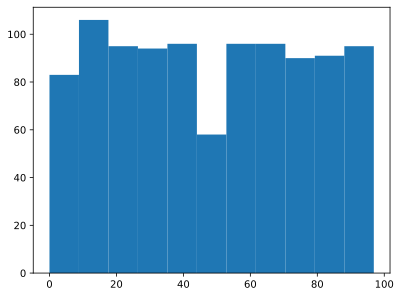

In [39]:
x = []
for i in range(1000):
    x.append( QRandom(0, 100, qubits = 5) )
    
n, bins, patches = plt.hist(x=x, bins='auto',)
print(x)
#plt.plot(x,'o')


plt.show()

**Exercise 1:** 
1) Scale the results of the random generator for several distributions
    


    a) binomial distribution;
    


In [40]:
def bin_map(values):
    values=np.sort(values)/max(values)
    n=len(values)
    m=np.mean(values)
    p=1/2
    pk=list()
    px=list()
    for k in range(n):
        pk.append(mt.factorial(n)/(mt.factorial(k)*mt.factorial(n-k))*p**k*(1-p)**(n-k))
    for k in range(n):
        pj_k1=0
        pj_k=0
        for j in range(k):
            pj_k+=pk[j]
            if j==k-1:
                pj_k+=pk[j+1]
            pj_k1+=pk[j]
        for i in range(n):
            if pj_k1 <= values[i] < pj_k:
                px.append(k)
    return px

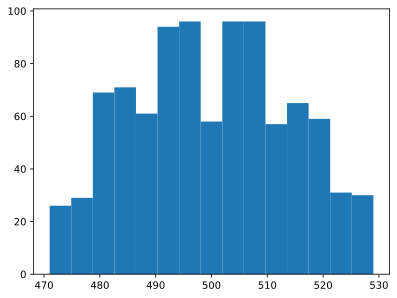

In [41]:
plt.hist(bin_map(x),bins="auto",)

plt.show()

    b) normal distribution.


Using a method called Box Muller.

Given $x_1$ and $x_2$ being random variables of a uniform distribution. We have that $z_1$ and $z_2$ are random variables which follow a gaussian variables if they are related to the random variables $x_1$ and $x_2$ by,
$$
z_1=\sqrt{-2\ln(x_1)}\cos(2\pi x_2) \\[10pt]

z_2=\sqrt{-2\ln(x_1)}\sin(2\pi x_2)
$$

In [42]:
def gauss_map(values):
    values=np.sort(values)/max(values)
    n=len(values)
    gauss_val=list()
    for i in range(n):
        for j in range(n):
            if j!=i and values[i]!=0:
                z1=np.sqrt(-2*np.log(values[i]))*np.cos(2*np.pi*values[j])
                z2=np.sqrt(-2*np.log(values[i]))*np.sin(2*np.pi*values[j])
                gauss_val.append(z1)
                gauss_val.append(z2)       
    return gauss_val

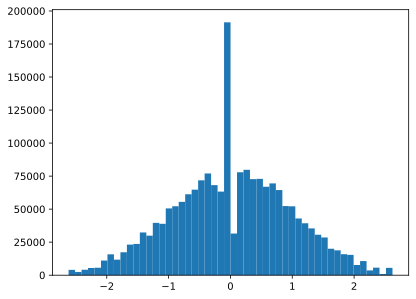

In [43]:
plt.hist(gauss_map(x),50)
 
plt.show()


  
2) Determine how the running time of the random generator depends on the number of qubits used.
 

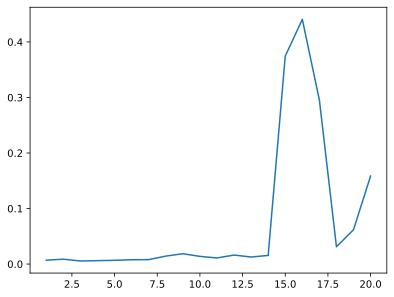

In [44]:
import time
tim=list()
for i in range(20):
    start=time.time()
    QRandom(0,100,i+1)
    end=time.time()
    tim.append(end-start)
plot(np.arange(1,20+1),tim)


   
3) Repeat the previous question using  the IBM computer.


In [45]:
def QRandom(a, b, qubits):
    # Quantum Random Number generator
    q = QuantumRegister(qubits, 'q')
    c = ClassicalRegister(qubits, 'c')
    circ = QuantumCircuit(q,c)

    for i in range(qubits):
        circ.h(q[i])


    for i in range(qubits):
        circ.measure(q[i], c[i])

    #circ.draw(output='mpl')


    backend = Aer.get_backend('statevector_simulator')
    job = execute(circ, backend)
    #print(job.status())
    result = job.result()

    execution_time = result.time_taken
    measurement_result = result.get_counts(circ)

    number = int(getKeysByValue(measurement_result,1)[0],2)
    
    return execution_time

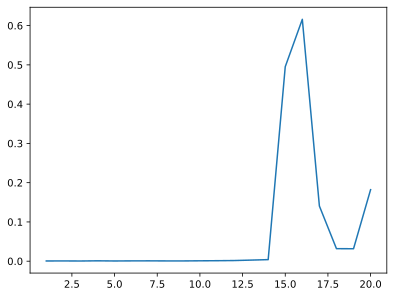

In [46]:
tim=list()
for i in range(20):
    time=QRandom(0,100,i+1)
    tim.append(time)
plot(np.arange(1,20+1),tim)



4) Comment on the previous results.



**Exercise 2:** 
1) Adapt the following code to yield a random generator with the distributions


    
    a) binomial distribution;
    


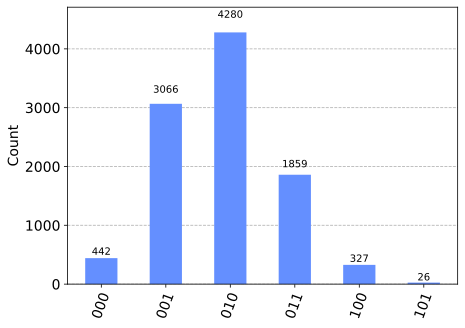

In [47]:
from qiskit import *
import numpy as np

# Set the number of qubits
N = 3

# Set the coefficients of the superposition
coeffs=np.zeros(2**N)
p=1/4
n=len(coeffs)
for k in range(n):
        coeffs[k]=mt.factorial(n)/(mt.factorial(k)*mt.factorial(n-k))*p**k*(1-p)**(n-k)

# Normalize the coefficients
coeffs_norm = np.sqrt(np.sum(np.square(coeffs)))
coeffs = np.array(coeffs) / coeffs_norm

# Initialize the circuit
qc = QuantumCircuit(N, N)

# Prepare the generic quantum state
qc.initialize(coeffs, range(N))

# Measure all the qubits
qc.measure(range(N), range(N))

# Run the circuit on a simulator backend
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator,shots=10000).result()

# Get the counts from the result
counts = result.get_counts(qc)

# Plot the histogram of the measurement outcomes
plot_histogram(counts)


    b) normal distribution;
    


In [48]:
from qiskit import *
import numpy as np

# Set the number of qubits
N = 3

# Set the coefficients of the superposition
coeffs=np.zeros(2**N)
for i in range(len(coeffs)):
        dx=2/2**(N-1)
        x=-2+i*dx
        coeffs[i]=1/(np.sqrt(2*np.pi))*np.exp(-x**2)
print(dx)

# Normalize the coefficients
coeffs_norm = np.sqrt(np.sum(np.square(coeffs)))
coeffs = np.array(coeffs) / coeffs_norm

# Initialize the circuit
qc = QuantumCircuit(N, N)

# Prepare the generic quantum state
qc.initialize(coeffs, range(N))

# Measure all the qubits
qc.measure(range(N), range(N))

# Run the circuit on a simulator backend
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator,shots=10000).result()

# Get the counts from the result
counts = result.get_counts(qc)

# Plot the histogram of the measurement outcomes
plot_histogram(counts)


0.5


Directly from the quantum measurements, without the need to rescale the measurement results.

# Measurement statistics and quantum fluctuations


In quantum mechanics, measurements are fundamental to the study and understanding of quantum systems. However, the results of measurements on quantum systems can be unpredictable due to the inherent probabilistic nature of quantum mechanics. This unpredictability leads to statistical fluctuations in the measured results, which can pose a challenge when trying to extract information about the underlying quantum system.

When performing measurements on quantum systems, such as a set of qubits, there are three types of fluctuations that can be present: quantum fluctuations, sampling fluctuations, and thermal fluctuations.

Quantum fluctuations arise due to the probabilistic nature of quantum mechanics, and are related to the Heisenberg uncertainty principle. They can cause the measured values of a quantum observable to fluctuate even in the absence of external noise sources. Sampling fluctuations, on the other hand, arise due to the finite number of measurements that can be made on a quantum system. The statistical fluctuations in the measured results decrease as the number of measurements increases, and the mean value of the results converges to the expected value of the quantum observable. Finally, thermal fluctuations arise due to environmental noise sources, such as temperature fluctuations or electromagnetic radiation, which can affect the state of the quantum system and cause additional statistical fluctuations in the measured results.

To identify these different types of fluctuations in experimental data, it is important to analyze the statistics of the measured results. The mean value of the results should converge to the expected value of the quantum observable as the number of measurements increases. The standard deviation of the results can be used to estimate the level of quantum fluctuations present in the data, and can be compared to the expected level of quantum fluctuations for the specific quantum system being studied. If the standard deviation is larger than expected, additional noise sources, such as sampling or thermal fluctuations, may be present. The correlation between measurements at different times can also be used to identify the presence of thermal fluctuations.

Now, you are provided with an example of a measurement experiment to illustrate the impact of fluctuations in the results of measurements:

In [49]:
def getKeysByValue(dictOfElements, valueToFind):
    listOfKeys = list()
    listOfItems = dictOfElements.items()
    for item  in listOfItems:
        if item[1] == valueToFind:
            listOfKeys.append(item[0])
    return  listOfKeys

def calsum(str1): 
    Sum = 0
    for ch in str1: 
        if (ch.isdigit()): 
            Sum += int(ch) 
    return Sum

In [50]:
def Experiment(qubits=2):
    # Quantum Random Number generator
    q = QuantumRegister(qubits, 'q')
    c = ClassicalRegister(qubits, 'c')
    circ = QuantumCircuit(q,c)

    for i in range(qubits):
        circ.h(q[i])


    for i in range(qubits):
        circ.measure(q[i], c[i])

    #circ.draw(output='mpl')


    backend = Aer.get_backend('statevector_simulator')
    job = execute(circ, backend)
    #print(job.status())
    result = job.result()
    measurement_result = result.get_counts(circ)

    number = calsum(getKeysByValue(measurement_result,1)[0])/qubits
    
    return number

In [51]:
n_exp = 100
n_bits = 4
label = 5*np.arange(n_bits)+1
print(label)
data =[]
for qubits in label:
    x = []
    for i in range(n_exp):
        x.append( Experiment(qubits = qubits) )
    data.append(x)

[ 1  6 11 16]


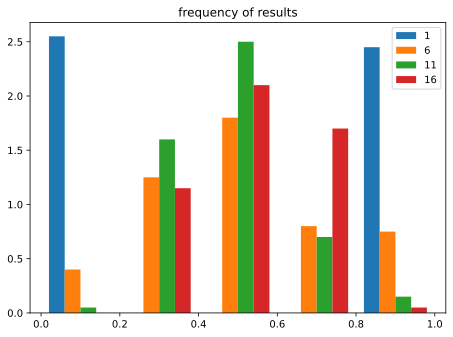

In [52]:
n_bins = 5
fig, axes = plt.subplots()
axes.hist(data, n_bins, density=True, histtype='bar',  label=label)
axes.legend(prop={'size': 10})
axes.set_title('frequency of results')
fig.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">
<b>Code Explained: </b>    
    
The getKeysByValue function takes a dictionary and a value, and returns a list of keys that correspond to that value in the dictionary. The calsum function takes a string and sums all the digits present in the string.

The Experiment function takes an optional argument qubits (default value 2) which specifies the number of qubits to use for the QRNG. A quantum circuit is constructed using qubits and classical bits initialized as quantum and classical registers respectively. The Hadamard gate is applied to each qubit, putting it in a superposition of 0 and 1. The circuit is then measured in the computational basis, and the resulting measurement is stored as a bit string. The bit string is then used to generate a random number by summing all the digits in the bit string and dividing it by the number of qubits used.

The Experiment function is called with different values of qubits for n_exp (default value 100) times. The resulting random numbers are collected in the data list. The hist function is used to create a histogram of the generated random numbers for each qubits value, with the number of bins set to n_bins (default value 5). The resulting histogram is plotted using matplotlib.
    
</div>


<div class="alert alert-block alert-info">
<b>Question 3:</b> Can you explain the rational of this algorithm? 
    
Hint: Check the supplementary videos in the moodle webpage.
    
</div> 

**Exercise 3:** 

Plot the evolution of the



a) mean number of counts as a function of the number of measurements.
    


In [53]:
n_exp=np.arange(50,10000)
n_bits = 4
label = 5*np.arange(n_bits)+1
data=[]    
for qubits in label:
    data_qubit=[]
    x=[]
    for i in range(1,n_exp[-1]+1):
        x.append(Experiment(qubits = qubits))
        data_qubit.append(np.mean(x))
    data.append(data_qubit)

In [58]:
plt.plot(n_exp,np.transpose(data)[48:-1],label=label)
plt.ylabel("Mean")
plt.xlabel("Number of measurements")
plt.legend(prop={'size': 10})

b)  standard deviation of counts as a function of the number of measurements.


In [59]:
import statistics
n_exp=np.arange(1,1000)
n_bits = 4
label = 5*np.arange(n_bits)+1
data=[]    
for qubits in label:
    data_qubit=[]
    x=[]
    x.append(Experiment(qubits = qubits))
    for i in range(2,len(n_exp)+2):
        x.append(Experiment(qubits = qubits))
        #sd=np.sqrt(np.sum(x-np.mean(x))**2/(len(x)-1))
        data_qubit.append(statistics.stdev(x))
    data.append(data_qubit)

In [60]:

plt.plot(n_exp,np.transpose(data),label=label)
plt.ylabel("Mean")
plt.xlabel("Number of measurements")
plt.legend(prop={'size': 10})


### Advanced exercises (for extra credits)<a class="tocSkip">
    


**Exercise 4:**
    
    Spice things up by adding noise into the previous model and analyze the differences in measurement statistics.
    
    


In [61]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error
# Example error probabilities
p_reset = 0.03
p_gate1 = 0.05

# QuantumError objects
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)

# Add errors to noise model
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["h"])

In [62]:
def Experiment_noise(qubits=2):
    # Quantum Random Number generator
    q = QuantumRegister(qubits, 'q')
    c = ClassicalRegister(qubits, 'c')
    circ = QuantumCircuit(q,c)

    for i in range(qubits):
        circ.h(q[i])


    for i in range(qubits):
        circ.measure(q[i], c[i])

    #circ.draw(output='mpl')


    backend = Aer.get_backend('statevector_simulator')
    job = execute(circ, backend,
              basis_gates=noise_bit_flip.basis_gates,
              noise_model=noise_bit_flip)
    result = job.result()
    measurement_result = result.get_counts(circ)
    
    number = calsum(getKeysByValue(measurement_result,1)[0])/qubits
    
    return number

Mean:

In [63]:
n_exp=np.arange(1,60)
n_bits = 4
label = 5*np.arange(n_bits)+1
data=[]    
for qubits in label:
    data_qubit=[]
    x=[]
    for i in range(1,n_exp[-1]+1):
        x.append(Experiment_noise(qubits = qubits))
        data_qubit.append(np.mean(x))
    data.append(data_qubit)

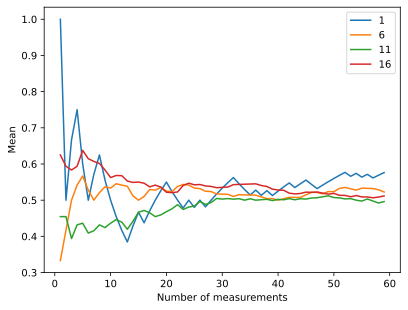

In [64]:
plt.plot(n_exp,np.transpose(data),label=label)
plt.ylabel("Mean")
plt.xlabel("Number of measurements")
plt.legend(prop={'size': 10})

Standard Deviation:

In [65]:
import statistics
n_exp=np.arange(1,400)
n_bits = 4
label = 5*np.arange(n_bits)+1
data=[]    
for qubits in label:
    data_qubit=[]
    x=[]
    x.append(Experiment(qubits = qubits))
    for i in range(2,len(n_exp)+2):
        x.append(Experiment_noise(qubits = qubits))
        #sd=np.sqrt(np.sum(x-np.mean(x))**2/(len(x)-1))
        data_qubit.append(statistics.stdev(x))
    data.append(data_qubit)

In [66]:

plt.plot(n_exp,np.transpose(data),label=label)
plt.ylabel("Mean")
plt.xlabel("Number of measurements")
plt.legend(prop={'size': 10})

**Exercise 5:**
    
    To really test your mastery, incorporate measurement imperfections in the previous model and analyze the differences in measurement statistics.

In [67]:
# Example error probabilities
p_reset = 0.03
p_meas = 0.1
p_gate1 = 0.05

# QuantumError objects
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])

# Add errors to noise model
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")

In [68]:
n_exp=np.arange(1,60)
n_bits = 4
label = 5*np.arange(n_bits)+1
data=[]    
for qubits in label:
    data_qubit=[]
    x=[]
    for i in range(1,n_exp[-1]+1):
        x.append(Experiment_noise(qubits = qubits))
        data_qubit.append(np.mean(x))
    data.append(data_qubit)

In [69]:
plt.plot(n_exp,np.transpose(data),label=label)
plt.ylabel("Mean")
plt.xlabel("Number of measurements")
plt.legend(prop={'size': 10})

Standard Deviation:

In [70]:
import statistics
n_exp=np.arange(1,400)
n_bits = 4
label = 5*np.arange(n_bits)+1
data=[]    
for qubits in label:
    data_qubit=[]
    x=[]
    x.append(Experiment(qubits = qubits))
    for i in range(2,len(n_exp)+2):
        x.append(Experiment_noise(qubits = qubits))
        #sd=np.sqrt(np.sum(x-np.mean(x))**2/(len(x)-1))
        data_qubit.append(statistics.stdev(x))
    data.append(data_qubit)

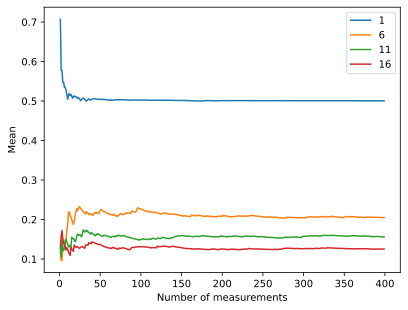

In [71]:

plt.plot(n_exp,np.transpose(data),label=label)
plt.ylabel("Mean")
plt.xlabel("Number of measurements")
plt.legend(prop={'size': 10})

# Quantum state tomography 


Quantum state tomography is a technique used in quantum mechanics to reconstruct the complete quantum state of a physical system. In other words, it is a method to determine the density matrix of a quantum system, which describes the probability of finding the system in any given state.

The technique involves performing a series of measurements on the system in order to obtain information about its state. The measurements are made in different bases, which allows for a complete description of the state. The results of the measurements are then used to reconstruct the density matrix of the system.

The process of quantum state tomography involves several steps. First, a set of measurements is chosen, typically involving a set of operators that form a basis for the space of states of the system. The measurements are then performed on a large number of identically prepared copies of the system. The results of the measurements are recorded and used to calculate the probabilities of the different measurement outcomes.

The next step is to use the probabilities to estimate the density matrix of the system. This is typically done using maximum likelihood estimation or other type of inference, which involves finding the density matrix that is most likely to have produced the observed measurement outcomes.

The final step is to verify the accuracy of the reconstructed density matrix. This is typically done by comparing the predicted probabilities of new measurements with the actual measured probabilities.

Quantum state tomography is an important tool in quantum information processing, as it allows for the characterization and verification of quantum states, which are essential for quantum computation and quantum communication.

We now provide you with an example of a quantum state tomography protocol. We begin with some useful definitions:

In [72]:
# define probability model
def nCr(n,r):
    f = mt.factorial
    return f(n) // f(r) // f(n-r)

def PEXPB(x,y,z,nx1,ny1,nz1, nx0,ny0,nz0):
    return nCr(nx1+nx0,nx1) * \
        np.power(0.5*(1+x),nx1) *\
        nCr(ny1+ny0,ny1) *\
        np.power(0.5*(1+y),ny1) * \
        nCr(nz1+nz0,nz1) *\
        np.power(0.5*(1+z),nz1)

In [ ]:
# Chose the state to be discriminated by the QST protocol
Theta = 0.25 * np.pi
Phi = (2.0-0.5) * np.pi
Lamb = 0.25 * np.pi

a = np.cos(0.5 * Theta)
b = np.sin(0.5 * Theta) * np.exp(1.0j * Phi)

inputstate = [a,b]
inputvector = [np.sin(Theta)*np.cos(Phi),np.sin(Theta)*np.sin(Phi),np.cos(Theta)]
plot_bloch_multivector(inputstate)

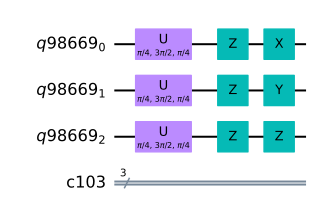

In [74]:
#Create the actual circuit 
n_qubits = 3
q = QuantumRegister(n_qubits)
c = ClassicalRegister(n_qubits)
circuit4 = QuantumCircuit(q,c)
#circuit4.h(q)


#All qubits are initialized in the same state
circuit4.u(Theta,Phi,Lamb,q)

#but each is rotated diferently in the Bloch sphere, aligning different components to the z axis
circuit4.z(q[0])
circuit4.x(q[0])

circuit4.z(q[1])
circuit4.y(q[1])

circuit4.z(q[2])
circuit4.z(q[2])



circuit4.draw(output='mpl')

[ 0.   +0.135j  0.327+0.j    -0.327+0.j     0.   +0.789j  0.056-0.j
 -0.   -0.135j  0.   +0.135j  0.327-0.j   ]


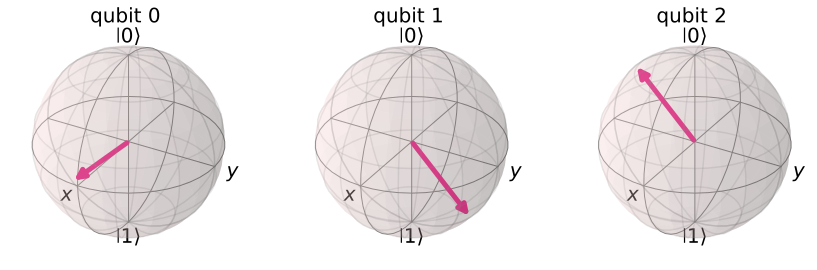

In [75]:
simulator = BasicAer.get_backend('statevector_simulator') # the device to run on
result = execute(circuit4, simulator).result()
outputstate = result.get_statevector(circuit4, decimals=3)

print(outputstate)
plot_bloch_multivector(outputstate)

<div class="alert alert-block alert-info">
<b>Question 4:</b> Since this is a numerical simulation we can have access to the full Bloch vector of the three qubits. How do you compare them? What is the relevance of their z component?
</div>


Applying the U-gate
$$
|0\rangle\xrightarrow{U(\pi/4,3\pi/2,\pi/4)}\begin{pmatrix} \cos(\theta/2) & -e^{i\lambda}\sin(\theta/2)\\
e^{i\phi}\sin(\theta/2)&e^{i(\phi+\lambda)}\cos(\theta/2) \end{pmatrix}|0\rangle=\cos(\theta/2)|0\rangle+e^{i\phi}\sin(\theta/2)|1\rangle
$$
Applying the z gate:
$$\cos(\theta/2)|0\rangle-e^{i\phi}\sin(\theta/2)|1\rangle$$
Knowing that:

X gate: $|0\rangle \leftrightarrow |1\rangle$

Z gate: $|0\rangle \leftrightarrow |0\rangle$ and $|1\rangle \leftrightarrow -|1\rangle$

Y gate: $|0\rangle \xrightarrow{\hat{Y}}i|1\rangle$ and $|1\rangle \xrightarrow{\hat{Y}}-i|0\rangle$

We have that applying the x, y and z gates we have:

X gate: $$\cos(\theta/2)|1\rangle-e^{i\phi}\sin(\theta/2)|0\rangle = -e^{i\phi}(\sin(\theta/2)|0\rangle-e^{-i\phi}\cos(\theta/2)|1\rangle)$$

Y gate: $$i(\cos(\theta/2)|1\rangle+e^{i\phi}\sin(\theta/2)|0\rangle)=ie^{i\phi}(\sin(\theta/2)|0\rangle+e^{-i\phi}\cos(\theta/2)|1\rangle)$$

Z gate: $$\cos(\theta/2)|0\rangle+e^{i\phi}\sin(\theta/2)|1\rangle$$

And their density matrices are:

First qubit: $$\begin{pmatrix} \sin^2(\theta/2) & -e^{-i\phi}\sin(\theta/2)\cos(\theta/2) \\ -e^{i\phi}\sin(\theta/2)\cos(\theta/2)&\cos^2(\theta/2)\end{pmatrix} $$
Second qubit: $$\begin{pmatrix} \sin^2(\theta/2) & e^{-i\phi}\sin(\theta/2)\cos(\theta/2) \\ e^{i\phi}\sin(\theta/2)\cos(\theta/2)&\cos^2(\theta/2)\end{pmatrix} $$
Third qubit: $$\begin{pmatrix} \cos^2(\theta/2) & e^{i\phi}\sin(\theta/2)\cos(\theta/2) \\ e^{-i\phi}\sin(\theta/2)\cos(\theta/2)&\sin^2(\theta/2)\end{pmatrix} $$


<div class="alert alert-block alert-info">
<b>Question 5:</b> Can you explain the rational of this algorithm? 
    
Hint: Check the supplementary videos in the moodle webpage.
    
</div> 

    
**Exercise 6:**

Verify whether this protocol works for a wide range of states.
    


In [81]:
def protocol(Theta,Phi,N_experiments):
    
    a = np.cos(0.5 * Theta)
    b = np.sin(0.5 * Theta) * np.exp(1.0j * Phi)

    inputstate = [a,b]

    inputvector = [np.sin(Theta)*np.cos(Phi),np.sin(Theta)*np.sin(Phi),np.cos(Theta)]
    #Create the actual circuit 
    n_qubits = 3
    q = QuantumRegister(n_qubits)
    c = ClassicalRegister(n_qubits)
    circuit4 = QuantumCircuit(q,c)
    #circuit4.h(q)


    #All qubits are initialized in the same state
    circuit4.u(Theta,Phi,Lamb,q)

    #but each is rotated diferently in the Bloch sphere, aligning different components to the z axis
    circuit4.z(q[0])
    circuit4.x(q[0])

    circuit4.z(q[1])
    circuit4.y(q[1])

    circuit4.z(q[2])
    circuit4.z(q[2])
    circuit4.measure(q,c)
    
    overlap_evolv=[]
    n_shots = int(mt.pow(2,4))
    [nx0,nx1,ny0,ny1,nz0,nz1]=[0,0,0,0,0,0]
    for n in range(N_experiments):
        #run an experiment

        backend = Aer.get_backend('qasm_simulator')
        job = execute(circuit4, backend, shots=n_shots)

        result = job.result()
        measurement_result = result.get_counts(circuit4)

        exp_results = list(measurement_result.keys())
        exp_freq = list(measurement_result.values())

        #Extract the results
        for i in range(len(exp_results)):
            nx1 += int(exp_results[i][2]) * exp_freq[i]
            nx0 += (1-int(exp_results[i][2])) * exp_freq[i]

            ny1 += int(exp_results[i][1]) * exp_freq[i]
            ny0 += (1-int(exp_results[i][1])) * exp_freq[i]

            nz1 += int(exp_results[i][0]) * exp_freq[i]
            nz0 += (1-int(exp_results[i][0])) * exp_freq[i]
        
        direct=[(nx1-nx0)/(nx1+nx0),(ny0-ny1)/(ny1+ny0),(nz0-nz1)/(nz1+nz0)]   
        outputvector = direct/np.linalg.norm(direct)
        overlap = np.abs(np.dot(outputvector,inputvector))*100

        overlap_evolv.append(overlap)
    return overlap_evolv

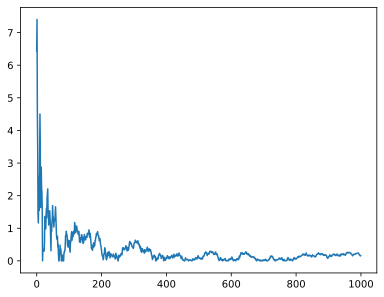

In [82]:
theta=np.pi/4
phi=np.pi
plot(protocol(theta,phi,1000))

In [ ]:
theta=np.linspace(0,np.pi,100)
phi=np.linspace(0,2*np.pi,100)
heat_map=np.zeros((len(theta),len(phi)))

for i in range(len(theta)):
    for j in range(len(phi)):
        x=protocol(theta[i],phi[j],20)
        heat_map[i,j]=x[-1]

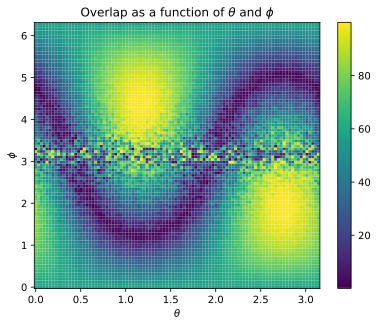

In [84]:
plt.pcolormesh(theta,phi,heat_map)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\phi$')
plt.colorbar()
plt.title(r"Overlap as a function of $\theta$ and $\phi$")
plt.show()

    
### Advanced exercises (for extra credits)<a class="tocSkip">


    
**Exercise 7:**

Redesign the code to allow for quantum state tomography of mixed states.
  

In [85]:
def protocol_mixed(Theta,Phi,N_experiments):
    
    a = np.cos(0.5 * Theta)
    b = np.sin(0.5 * Theta) * np.exp(1.0j * Phi)

    inputstate = [a,b]

    inputvector = [np.sin(Theta)*np.cos(Phi),np.sin(Theta)*np.sin(Phi),np.cos(Theta)]
    #Create the actual circuit 
    n_qubits = 3
    q = QuantumRegister(n_qubits)
    c = ClassicalRegister(n_qubits)
    circuit4 = QuantumCircuit(q,c)
    #circuit4.h(q)
    circuit4.u(Theta,Phi,Lamb,q)

    #circuit.h(0)
    for i in range(1,n_qubits):
        circuit.cx(0, i)
    
    circuit4.measure(q,c)
    overlap_evolv=[]
    n_shots = int(mt.pow(2,4))
    [nx0,nx1,ny0,ny1,nz0,nz1]=[0,0,0,0,0,0]
    for n in range(N_experiments):
        #run an experiment

        backend = Aer.get_backend('qasm_simulator')
        job = execute(circuit4, backend, shots=n_shots)

        result = job.result()
        measurement_result = result.get_counts(circuit4)

        exp_results = list(measurement_result.keys())
        exp_freq = list(measurement_result.values())

        #Extract the results
        for i in range(len(exp_results)):
            nx1 += int(exp_results[i][2]) * exp_freq[i]
            nx0 += (1-int(exp_results[i][2])) * exp_freq[i]

            ny1 += int(exp_results[i][1]) * exp_freq[i]
            ny0 += (1-int(exp_results[i][1])) * exp_freq[i]

            nz1 += int(exp_results[i][0]) * exp_freq[i]
            nz0 += (1-int(exp_results[i][0])) * exp_freq[i]
        
        direct=[(nx1-nx0)/(nx1+nx0),(ny0-ny1)/(ny1+ny0),(nz0-nz1)/(nz1+nz0)]   
        outputvector = direct/np.linalg.norm(direct)
        overlap = np.abs(np.dot(outputvector,inputvector))*100

        overlap_evolv.append(overlap)
    return overlap_evolv

In [ ]:
theta=np.linspace(0,np.pi,100)
phi=np.linspace(0,2*np.pi,100)
heat_map=np.zeros((len(theta),len(phi)))

for i in range(len(theta)):
    for j in range(len(phi)):
        x=protocol_mixed(theta[i],phi[j],100)
        heat_map[i,j]=x[-1]

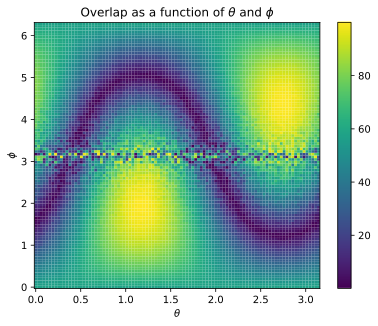

In [87]:
plt.pcolormesh(theta,phi,heat_map)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\phi$')
plt.colorbar()
plt.title(r"Overlap as a function of $\theta$ and $\phi$")
plt.show()

  
**Exercise 8:** 

Alter the protocol to allow for Baynesian learning.

In [7]:

import pymc as pm

def Bayesian_inference_Poisson(data,show):

    with pm.Model() as model:

        # Uniform prior

        lambda_ = pm.Uniform('lambda', lower=0, upper=np.max(data))

        

        # Likelihood

        y = pm.Poisson('y', mu=lambda_, observed=data)

        

        # MCMC sampling

        trace = pm.sample(5000, chains=2, tune=1000)

    # Plot the posterior distribution
    if show=="yes":
        pm.plot_posterior(trace)
        plt.show()
    return np.mean(trace.__getitem__("observed_data").__getitem__("y"))

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [8]:
def protocol_learn(Theta,Phi,N_experiments):
    
    a = np.cos(0.5 * Theta)
    b = np.sin(0.5 * Theta) * np.exp(1.0j * Phi)

    inputstate = [a,b]

    inputvector = [np.sin(Theta)*np.cos(Phi),np.sin(Theta)*np.sin(Phi),np.cos(Theta)]
    #Create the actual circuit 
    n_qubits = 3
    q = QuantumRegister(n_qubits)
    c = ClassicalRegister(n_qubits)
    circuit4 = QuantumCircuit(q,c)
    #circuit4.h(q)




    circuit4.measure(q,c)
    
    overlap_evolv=[]
    n_shots = int(mt.pow(2,4))
    [nx0,nx1,ny0,ny1,nz0,nz1]=[0,0,0,0,0,0]
    for n in range(N_experiments):
        #run an experiment

        backend = Aer.get_backend('qasm_simulator')
        job = execute(circuit4, backend, shots=n_shots)

        result = job.result()
        measurement_result = result.get_counts(circuit4)

        exp_results = list(measurement_result.keys())
        exp_freq = list(measurement_result.values())

        #Extract the results
        for i in range(len(exp_results)):
            nx1 += int(exp_results[i][2]) * exp_freq[i]
            nx0 += (1-int(exp_results[i][2])) * exp_freq[i]

            ny1 += int(exp_results[i][1]) * exp_freq[i]
            ny0 += (1-int(exp_results[i][1])) * exp_freq[i]

            nz1 += int(exp_results[i][0]) * exp_freq[i]
            nz0 += (1-int(exp_results[i][0])) * exp_freq[i]
        
        direct=[(nx1-nx0)/(nx1+nx0),(ny0-ny1)/(ny1+ny0),(nz0-nz1)/(nz1+nz0)]   
        outputvector = direct/np.linalg.norm(direct)
        
        overlap = np.abs(np.dot(outputvector,inputvector))*100
        
        overlap_evolv.append(overlap)
    return overlap_evolv

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [lambda]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 3 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


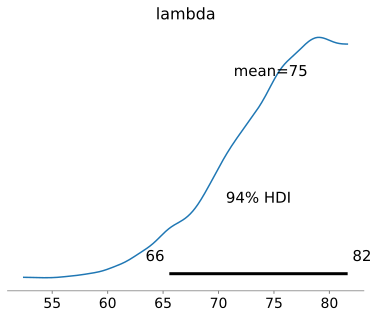

<xarray.DataArray 'y' ()>
array(81.)

In [97]:
theta=np.pi/4
phi=np.pi
Bayesian_inference_Poisson(protocol_learn(theta,phi,1),"yes")

In [ ]:
theta=np.linspace(0,np.pi,10)
phi=np.linspace(0,2*np.pi,10)
heat_map=np.zeros((len(theta),len(phi)))
from tqdm import tqdm

for i in tqdm(range(len(theta))):
    for j in range(len(phi)):
        x=Bayesian_inference_Poisson(protocol_learn(theta[i],phi[j],1),"no")
        heat_map[i,j]=x

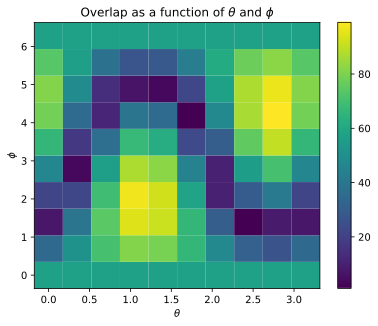

In [14]:
plt.pcolormesh(theta,phi,heat_map)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\phi$')
plt.colorbar()
plt.title(r"Overlap as a function of $\theta$ and $\phi$")
plt.show()

<div class="alert alert-success">
<b>Today's afterthoughts:</b>

What has changed, if anything, in your perspective about quantum measurements after this notebook?
</div>

In my perspective i can see that now statistics plays an important role in quantum computing, we can alter about everythin now in a quantum circuit and simulate real life situations.